### 7 Implement multilayer perceptron with back propagation (student should 
implement mathematical operations of back propagation with suitable
example).

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

# Get dummy variable 
y = pd.get_dummies(y).values

y[:3]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [6]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [7]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [8]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [17]:
#Backpropagation Neural Network

for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results = pd.concat([results, pd.DataFrame({"mse": [mse], "accuracy": [acc]})], ignore_index=True)
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

<Axes: title={'center': 'Mean Squared Error'}>

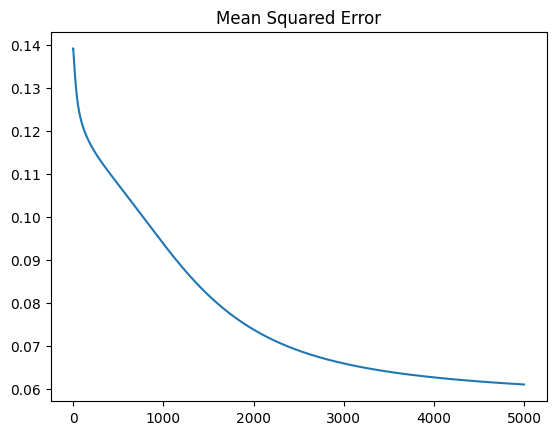

In [18]:
results.mse.plot(title="Mean Squared Error")

<Axes: title={'center': 'Accuracy'}>

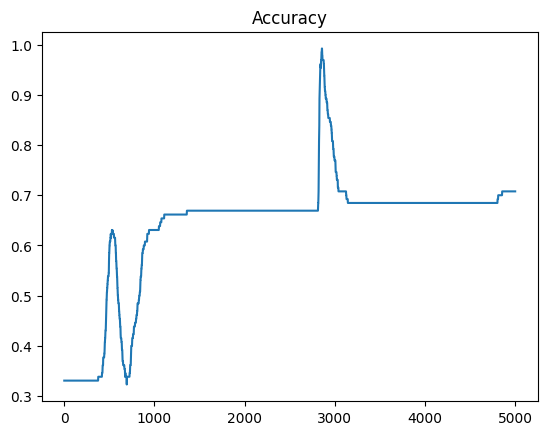

In [19]:
results.accuracy.plot(title="Accuracy")

In [21]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8


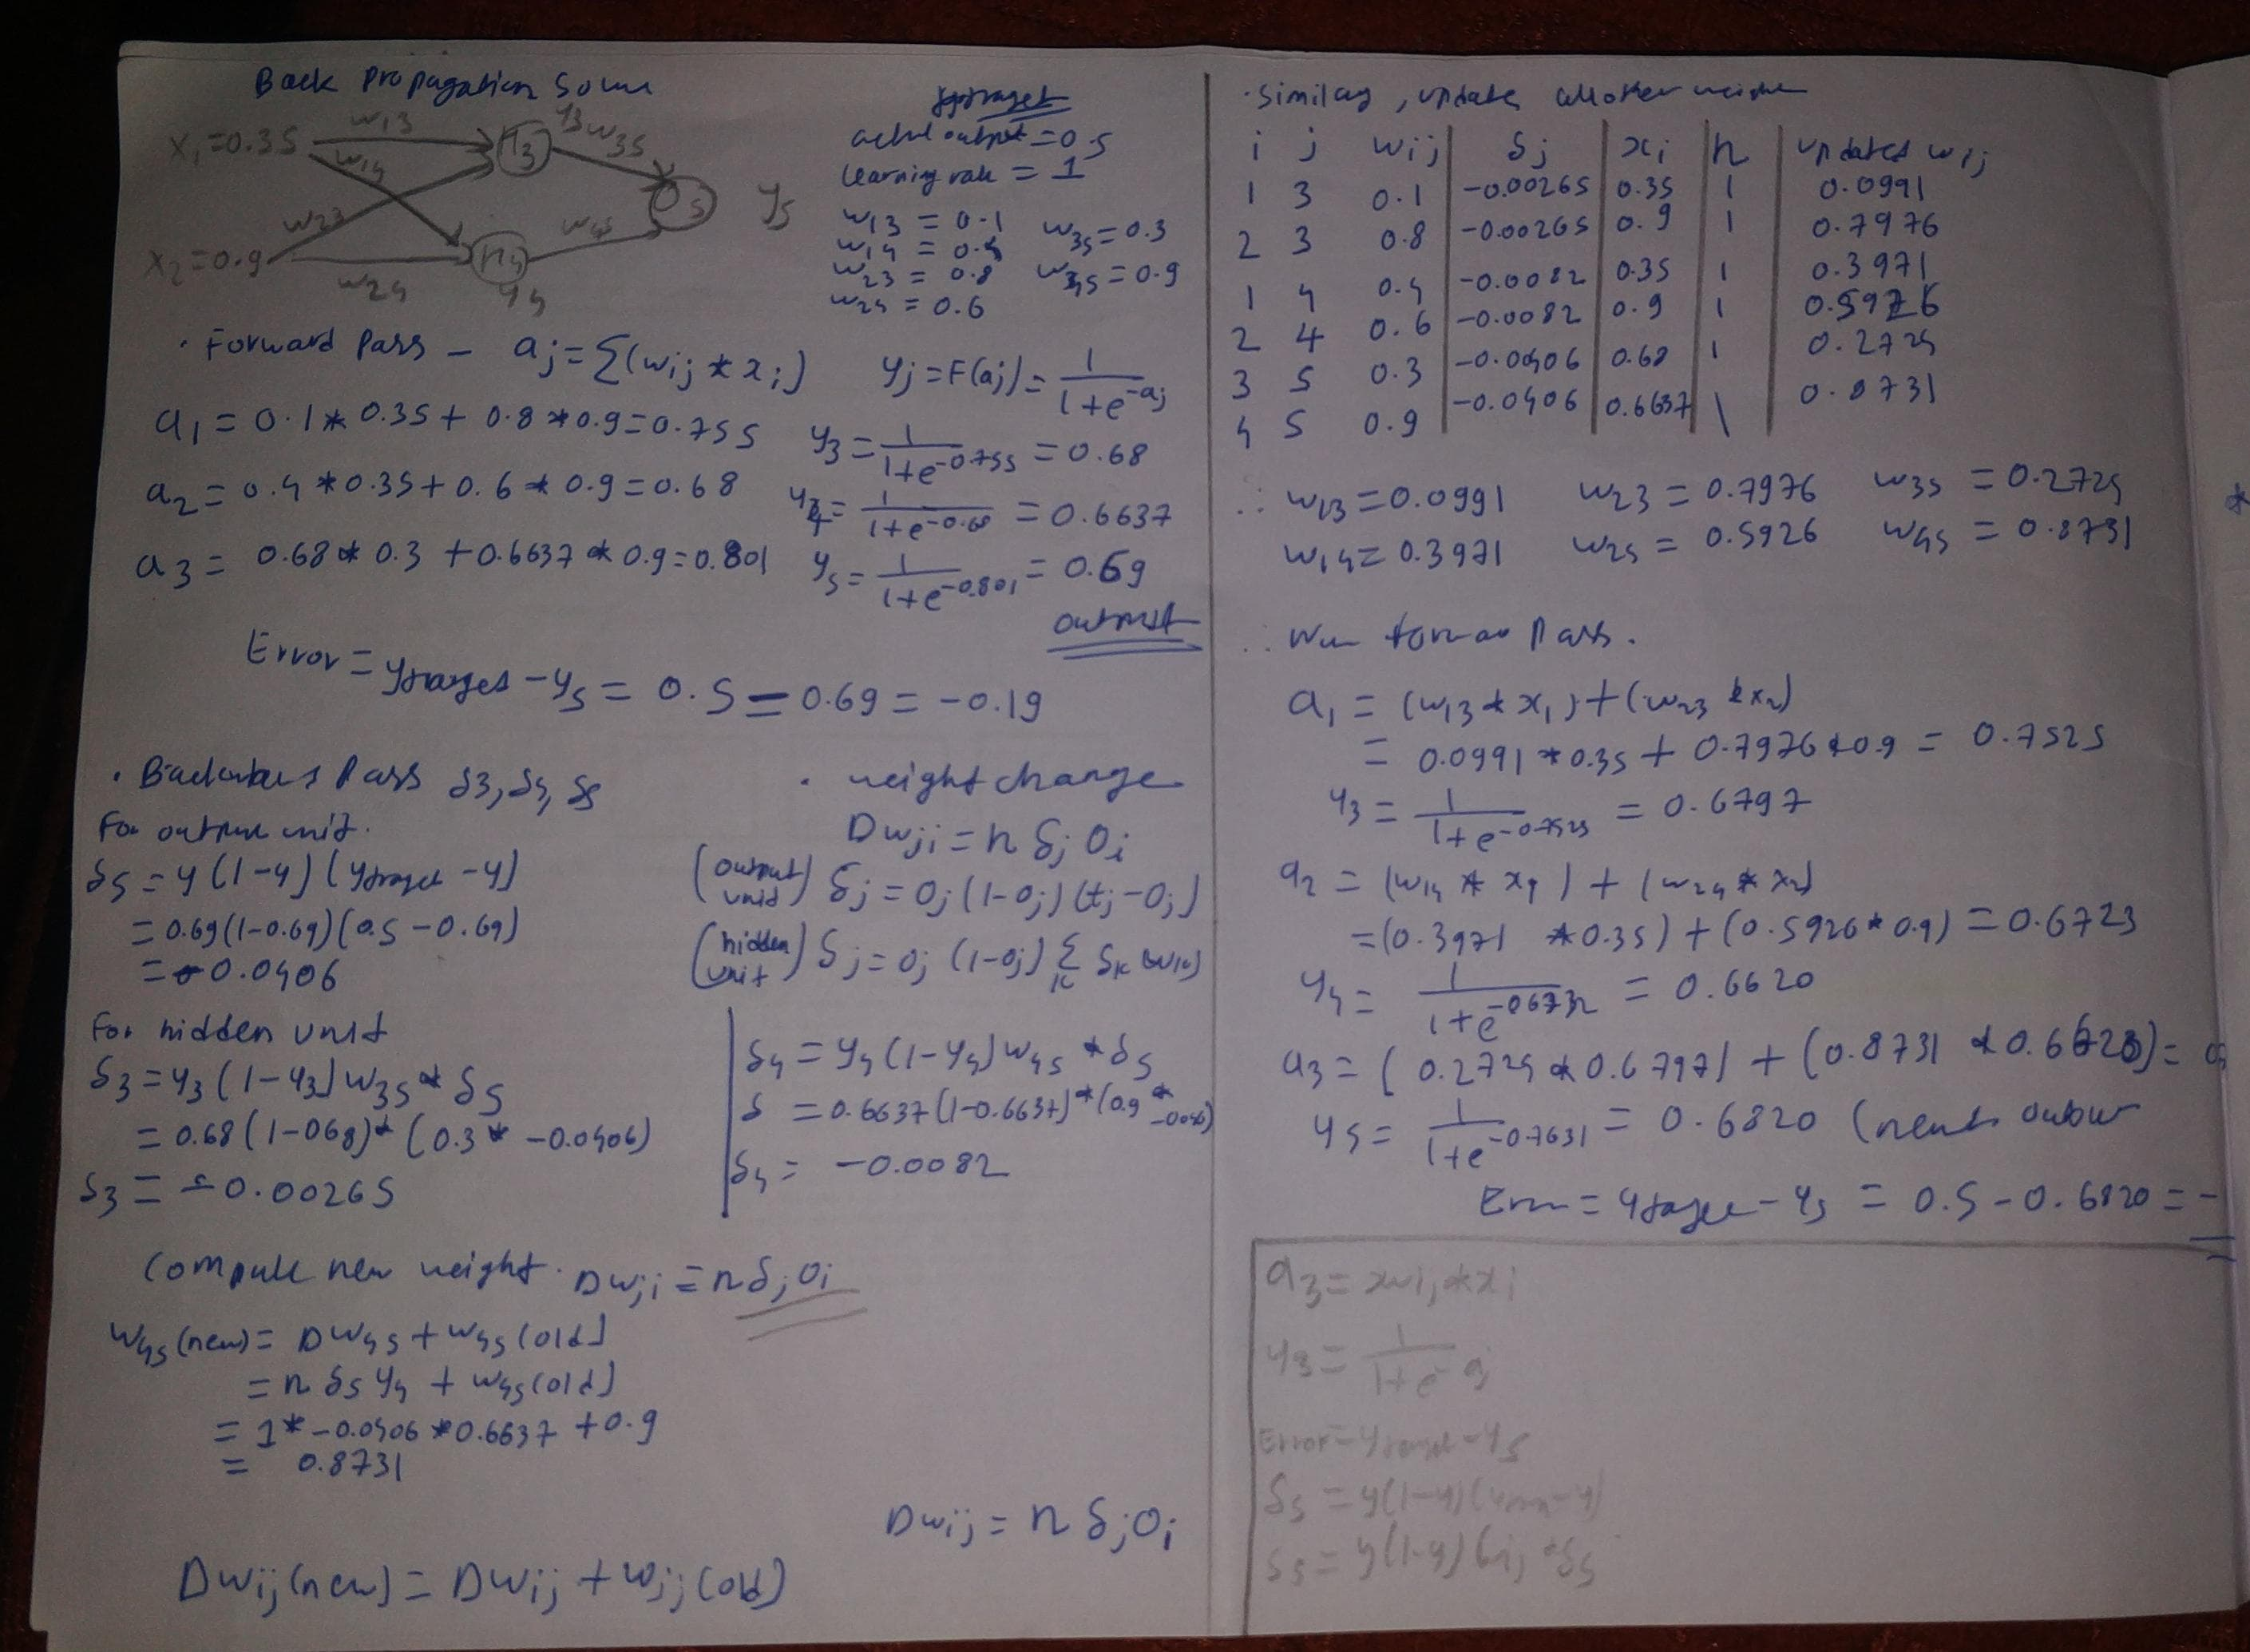

In [22]:
from IPython import display
display.Image("back.jpg")

In [1]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Set the input data (XOR)
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])

# Set the true outputs sum of two numbers
y_true = np.array([[0],[0],[0],[1]])

# Initialize weights and biases randomly
input_size = 2
hidden_size = 4
output_size = 1

hidden_weights = np.random.uniform(size=(input_size, hidden_size))
hidden_bias = np.random.uniform(size=(1, hidden_size))
output_weights = np.random.uniform(size=(hidden_size, output_size))
output_bias = np.random.uniform(size=(1, output_size))

learning_rate = 0.1
epochs = 10000

# Training the network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    output_error = y_true - predicted_output
    output_delta = output_error * sigmoid_derivative(predicted_output)

    hidden_error = output_delta.dot(output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    output_weights += learning_rate * hidden_layer_output.T.dot(output_delta)
    output_bias += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    hidden_weights += learning_rate * X.T.dot(hidden_delta)
    hidden_bias += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

# Testing the trained network
hidden_layer = sigmoid(np.dot(X, hidden_weights) + hidden_bias)
output_layer = sigmoid(np.dot(hidden_layer, output_weights) + output_bias)

print("Predicted Output after Training:")
print(output_layer)
threshold = 0.5
rounded_output = np.round(output_layer)
rounded_output = (output_layer > threshold).astype(int)

print("Rounded Output:")
print(rounded_output)

Predicted Output after Training:
[[8.49620355e-04]
 [2.56793058e-02]
 [2.68623465e-02]
 [9.61312997e-01]]
Rounded Output:
[[0]
 [0]
 [0]
 [1]]
